# Principal Component Analysis

PCA is an unsupervised machine learning algorithm applied for dimensionality reduction. PCA is more like transforming the given data by finding what features explain the most variance in the given data. 

Let's see how PCA helps in compressing and visualizing Scikit Learn's load_breast_cancer dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

%matplotlib inline

In [2]:
sn.set_style('whitegrid')

### Loading the Data

In [3]:
from sklearn.datasets import load_breast_cancer

In [4]:
cancer_data = load_breast_cancer()

In [5]:
cancer_data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [6]:
#print(cancer['DESCR'])

Lets create a Pandas dataframe from this dictionary

In [7]:
df = pd.DataFrame(cancer_data['data'],columns=cancer_data['feature_names'])

In [8]:
df.head(2)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [9]:
df.shape

(569, 30)

### PCA Visualization

Since the dataframe has 30 features, it is difficult to visualize them. With PCA, it is posible to reduce the number of features from 30 to 2 (which can be visualized easily). But first, lets perform the feature normalization on df.

In [10]:
# Feature scaling

from sklearn.preprocessing import StandardScaler

In [11]:
scaler = StandardScaler()

In [12]:
scaler.fit(df)
scaled_data = scaler.transform(df)

In [13]:
# Performing PCA

from sklearn.decomposition import PCA

In [14]:
#Step 1: Object instantiation

pca = PCA(n_components = 2)  # we need two dimensional input space!

In [15]:
# Step 2: find the principal components using the fit method

pca.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [16]:
# Step 3: apply the rotation and dimensionality reduction by calling transform()

z = pca.transform(scaled_data)

In [17]:
# Here z is the compressed data from input space.

z.shape

(569, 2)

We've reduced 30 dimensions to just 2! Let's plot these two dimensions out!

Text(0, 0.5, 'Second Principal Component')

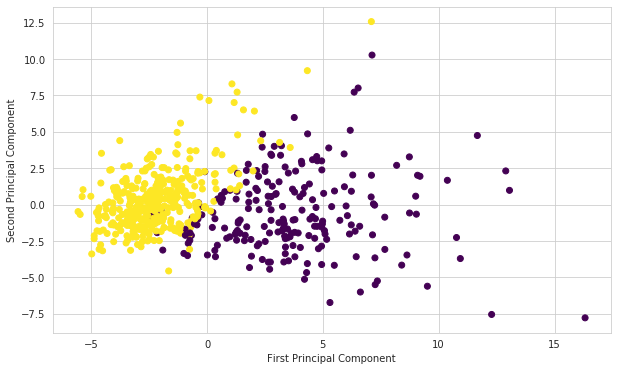

In [18]:
plt.figure(figsize = (10,6))
plt.scatter(z[:,0], z[:,1], c = cancer_data['target'], cmap = 'viridis')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

Clearly by using these two components we can easily separate these two classes.

### Interpreting the components 

The principal components correspond to combinations of the original features, the components themselves are stored as an attribute of the fitted PCA object. Let's analyze this using a heatmap.

In [19]:
pca.components_

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])

In this numpy matrix array, each row represents a principal component, and each column relates back to the original features. 

In [20]:
pca_df = pd.DataFrame(pca.components_, columns = cancer_data['feature_names'])
pca_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.218902,0.103725,0.227537,0.220995,0.142590,0.239285,0.258400,0.260854,0.138167,0.064363,...,0.227997,0.104469,0.236640,0.224871,0.127953,0.210096,0.228768,0.250886,0.122905,0.131784
1,-0.233857,-0.059706,-0.215181,-0.231077,0.186113,0.151892,0.060165,-0.034768,0.190349,0.366575,...,-0.219866,-0.045467,-0.199878,-0.219352,0.172304,0.143593,0.097964,-0.008257,0.141883,0.275339


The rows 0,1 refer to first principal component and second principal component respectively.

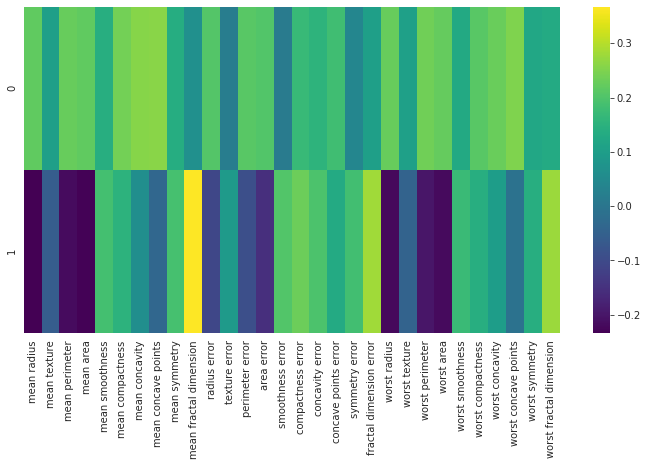

In [21]:
plt.figure(figsize = (12,6))
sn.heatmap(pca_df, cmap = 'viridis')

This heatmap and the color bar basically represent the correlation between the various feature and the principal component itself.